In [1]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.6/461.6 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings('ignore')



In [3]:
iphone_reviews=[]

In [4]:
for i in range(1,51):

  op = []
  url = 'https://www.amazon.in/product-reviews/B0CHX68YG9/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar'+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")
  reviews = soup.findAll('span',attrs= {"class","a-size-base review-text review-text-content"})
  for i in range(len(reviews)):
    op.append(reviews[i].text)
  iphone_reviews = iphone_reviews+op

In [5]:
iphone_reviews

['\nThe phone is really good it had some overheating issue as heard but not faced any it was due to software update now it is all fixed I still did not had any issue regarding overheating. The phone is really fast and the battery life is awesome. The new action button is really handy and useful. The camera is the best camera an iPhone ever had the photos are stunning and spectacular…. I am satisfied with the phone..\n',
 '\nIt’s a fantastic phone…the feel and comfort in hand is awesome…looks stunning…also the brand appeal of Apple is fabulous. Camera is the best, performance is over the top…really fast and the games you can play are of play station’s…can any other phone do that…also the video quality is very nice…\n',
 '\nIt’s around 2months I have been using this device and it has been working flawlessly. No heating issues or such. Totally worth the upgrade because of the camera.\n',
 '\nIt’s a great buy. I upgraded from XS Max and am so glad I decided to get this. It’s pricey but wor

In [6]:
reviews = ' '.join(iphone_reviews)

In [7]:
reviews=reviews.lower()
reviews

'\nthe phone is really good it had some overheating issue as heard but not faced any it was due to software update now it is all fixed i still did not had any issue regarding overheating. the phone is really fast and the battery life is awesome. the new action button is really handy and useful. the camera is the best camera an iphone ever had the photos are stunning and spectacular…. i am satisfied with the phone..\n \nit’s a fantastic phone…the feel and comfort in hand is awesome…looks stunning…also the brand appeal of apple is fabulous. camera is the best, performance is over the top…really fast and the games you can play are of play station’s…can any other phone do that…also the video quality is very nice…\n \nit’s around 2months i have been using this device and it has been working flawlessly. no heating issues or such. totally worth the upgrade because of the camera.\n \nit’s a great buy. i upgraded from xs max and am so glad i decided to get this. it’s pricey but worth it. very p

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.tokenize import word_tokenize
reviews_token = word_tokenize(reviews)

In [11]:

from nltk.corpus import stopwords
reviews_no_stopwords = [w for w in reviews_token if not w in stopwords.words()]


In [12]:
reviews_no_stopwords

['phone',
 'overheating',
 'issue',
 'heard',
 'faced',
 'due',
 'software',
 'update',
 'fixed',
 'issue',
 'overheating',
 '.',
 'phone',
 'fast',
 'battery',
 'life',
 'awesome',
 '.',
 'action',
 'button',
 'handy',
 '.',
 'camera',
 'camera',
 'iphone',
 'photos',
 'stunning',
 'spectacular…',
 '.',
 'satisfied',
 'phone',
 '..',
 '’',
 'fantastic',
 'phone…the',
 'feel',
 'comfort',
 'hand',
 'awesome…looks',
 'stunning…also',
 'brand',
 'appeal',
 'apple',
 'fabulous',
 '.',
 'camera',
 ',',
 'performance',
 'top…really',
 'fast',
 'games',
 'play',
 'play',
 'station',
 '’',
 's…can',
 'phone',
 'that…also',
 'video',
 'quality',
 'nice…',
 '’',
 '2months',
 'device',
 'working',
 'flawlessly',
 '.',
 'heating',
 'issues',
 '.',
 'totally',
 'worth',
 'upgrade',
 'camera',
 '.',
 '’',
 'great',
 'buy',
 '.',
 'upgraded',
 'xs',
 'max',
 'glad',
 'decided',
 '.',
 '’',
 'pricey',
 'worth',
 '.',
 'powerful',
 'battery',
 'fast',
 'charging',
 'ultimate',
 'performance',
 'perfor

In [13]:
reviews = ' '.join(reviews_no_stopwords)
reviews

'phone overheating issue heard faced due software update fixed issue overheating . phone fast battery life awesome . action button handy . camera camera iphone photos stunning spectacular… . satisfied phone .. ’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play station ’ s…can phone that…also video quality nice… ’ 2months device working flawlessly . heating issues . totally worth upgrade camera . ’ great buy . upgraded xs max glad decided . ’ pricey worth . powerful battery fast charging ultimate performance performance strong charging phone overheating issue heard faced due software update fixed issue overheating . phone fast battery life awesome . action button handy . camera camera iphone photos stunning spectacular… . satisfied phone .. ’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play

word cloud visualization

In [14]:
def plot_cloud(wordcloud):
  plt.figure(figure=(60,40))
  plt.imshow(wordcloud)
  plt.axis('off')

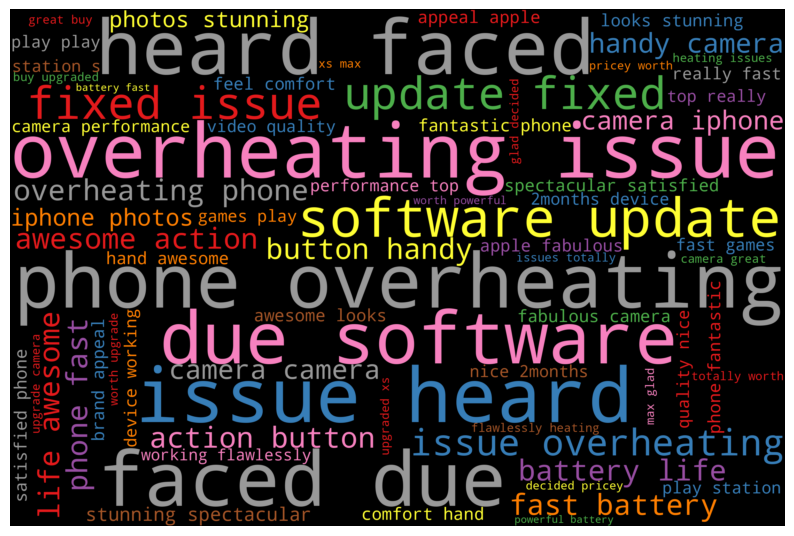

In [15]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color='black',
                      max_words=70,
                      colormap='Set1',
                      stopwords=STOPWORDS).generate(reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
reviews1 = reviews
reviews1[0:1000]

'phone overheating issue heard faced due software update fixed issue overheating . phone fast battery life awesome . action button handy . camera camera iphone photos stunning spectacular… . satisfied phone .. ’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play station ’ s…can phone that…also video quality nice… ’ 2months device working flawlessly . heating issues . totally worth upgrade camera . ’ great buy . upgraded xs max glad decided . ’ pricey worth . powerful battery fast charging ultimate performance performance strong charging phone overheating issue heard faced due software update fixed issue overheating . phone fast battery life awesome . action button handy . camera camera iphone photos stunning spectacular… . satisfied phone .. ’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [18]:
one_block = reviews1[0:1000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent',jupyter=True)

In [19]:
one_block


'phone overheating issue heard faced due software update fixed issue overheating . phone fast battery life awesome . action button handy . camera camera iphone photos stunning spectacular… . satisfied phone .. ’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play station ’ s…can phone that…also video quality nice… ’ 2months device working flawlessly . heating issues . totally worth upgrade camera . ’ great buy . upgraded xs max glad decided . ’ pricey worth . powerful battery fast charging ultimate performance performance strong charging phone overheating issue heard faced due software update fixed issue overheating . phone fast battery life awesome . action button handy . camera camera iphone photos stunning spectacular… . satisfied phone .. ’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play

In [20]:
from google.colab import files
upliaded=files.upload()

Saving negative-words.txt to negative-words.txt


In [36]:
nw = pd.read_csv('negative-words.txt', error_bad_lines=False, encoding='latin-1')
nw

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [22]:
from google.colab import files
upliaded=files.upload()

Saving positive-words.txt to positive-words.txt


In [23]:
pw = pd.read_csv('positive-words.txt', error_bad_lines=False, encoding='latin-1')
pw

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [24]:
pw =pw.iloc[25:]
pw =pw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
pw.reset_index(inplace=True)
pw =pw.drop('index',axis=1)
pw['Score'] = 1
pw

,Words,Score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [25]:
nw = nw.iloc[25:]
nw = nw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
nw.reset_index(inplace=True)
nw = nw.drop('index',axis=1)
nw['Score'] = -1
nw

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [26]:
positive = len(pw)

In [27]:
negative = len(pw)

In [28]:
totals = len(reviews)

In [29]:
print('positive reviews:',positive/totals)

positive reviews: 0.08706975129128869


In [30]:
print('negative reviews:',positive/totals)

negative reviews: 0.08706975129128869


vabder lexicon

In [31]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [33]:
sia.polarity_scores(reviews)

{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 1.0}

In [34]:
def get_vader_sentiment(review):
  sia = SentimentIntensityAnalyzer()

  analysis = sia.polarity_scores(review)

  if analysis['compound']>0:
    return 'positive sentiment'
  elif analysis['compound']<0:
    return 'negative sentiment'
  else:
    return 'neutral'

In [35]:
get_vader_sentiment(reviews)

'positive sentiment'